In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd

#import api_key
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [3]:
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# list of cities to query
cities = ["London", "Paris", "Las Vegas", "Stockholm", "Sydney", "Hong Kong"]

# list for response results
lon = []
pressure = []

# loop through cities, make API request, and append desired results
for city in cities:
    response = requests.get(query_url + city).json()
    lon.append(response['coord']['lon'])
    pressure.append(response['main']['pressure'])

print(f"Longitude: {lon}")
print(f"Pressure: {pressure}")

Longitude: [-0.13, 2.35, -115.14, 18.06, 151.21, 114.16]
Pressure: [1020, 1020, 1009, 1010, 1025, 1009]


In [5]:
# build a dataframe from the cities, lon,and pressure lists

weather_data = {"city": cities, "pressure": pressure, "lon": lon}
weather_data = pd.DataFrame(weather_data)
weather_data

,city,pressure,lon
0,London,1020,-0.13
1,Paris,1020,2.35
2,Las Vegas,1009,-115.14
3,Stockholm,1010,18.06
4,Sydney,1025,151.21
5,Hong Kong,1009,114.16


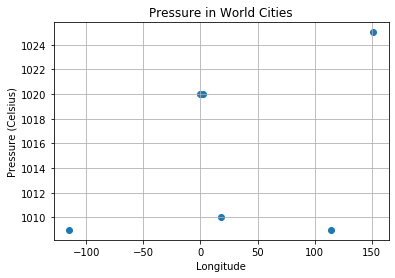

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lon"], weather_data["pressure"], marker="o")

# Incorporate the other graph properties
plt.title("Pressure in World Cities")
plt.ylabel("Pressure (Celsius)")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure
plt.savefig("PressureInWorldCities.png")

# Show plot
plt.show()
